In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy

In [8]:
# ---------------------------
# 1. Connect to SQL Server
# ---------------------------
server = "DESKTOP-5VCHN8F\\NODESERVER"      
database = "BSMSN" 

# لو تستخدم Windows Authentication
connection_string = f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# لو تستخدم SQL Authentication
# connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

engine = sqlalchemy.create_engine(connection_string)

# ---------------------------
# 2. Load Data from SQL Tables
# ---------------------------
data_df = pd.read_sql("SELECT * FROM data", engine)
zone_df = pd.read_sql("SELECT * FROM [zonal-data]", engine)
# ---------------------------
# 3. Merge on Zone
# ---------------------------
merged_df = pd.merge(data_df, zone_df, on="Zone", how="inner")

In [9]:
# Query 1: Zone & Country Investment
q1 = merged_df.groupby(["Zone", "InvestingCountry"]).agg(
    EnterpriseCount=("NameOfEnterprise", "count"),
    ZoneInvestment=("TotalInvestment", "sum")
).reset_index()

<Figure size 1200x600 with 0 Axes>

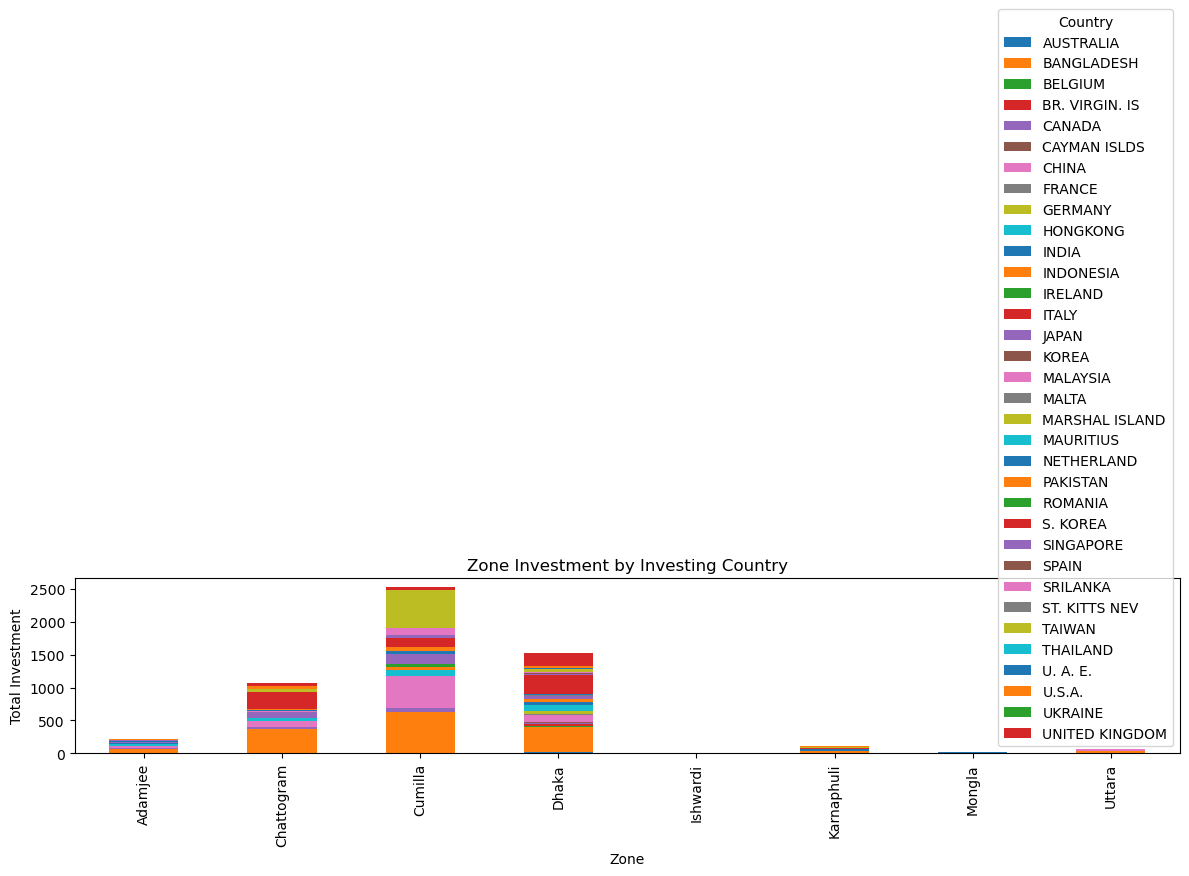

In [11]:
plt.figure(figsize=(12,6))
q1_pivot = q1.pivot(index="Zone", columns="InvestingCountry", values="ZoneInvestment").fillna(0)
q1_pivot.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Zone Investment by Investing Country")
plt.ylabel("Total Investment")
plt.xlabel("Zone")
plt.legend(title="Country")
plt.tight_layout()
plt.savefig("chart1_zone_investment_by_country.png")
plt.show()

In [12]:
# Query 2: Export performance by product
q2 = merged_df.groupby(["Zone", "Products"]).agg(
    EnterpriseCount=("NameOfEnterprise", "count"),
    TotalExport=("ExportEarned", "sum")
).reset_index()

<Figure size 1200x600 with 0 Axes>

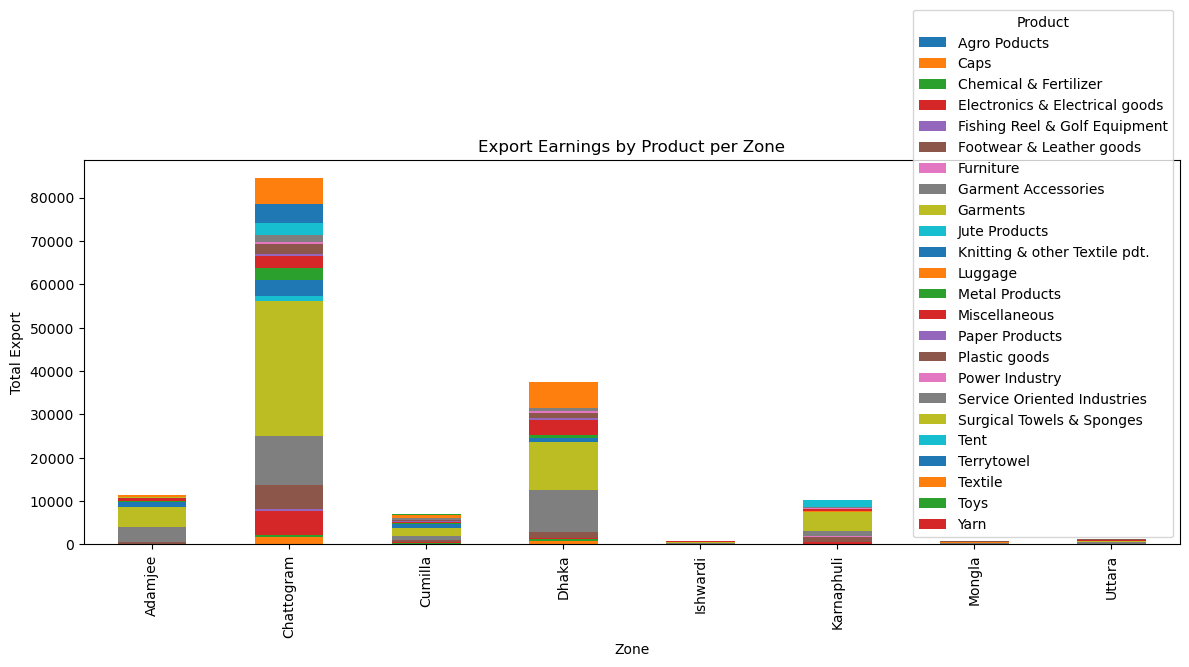

In [13]:
plt.figure(figsize=(12,6))
q2_pivot = q2.pivot(index="Zone", columns="Products", values="TotalExport").fillna(0)
q2_pivot.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Export Earnings by Product per Zone")
plt.ylabel("Total Export")
plt.xlabel("Zone")
plt.legend(title="Product")
plt.tight_layout()
plt.savefig("chart2_export_by_product.png")
plt.show()

In [14]:
# Query 3: Jobs per enterprise per zone
q3 = merged_df.groupby("Zone").agg(
    EnterpriseCount=("NameOfEnterprise", "count"),
    TotalJobs=("NewJobOpportunity", "sum")
).reset_index()
q3["JobsPerEnterprise"] = q3["TotalJobs"] / q3["EnterpriseCount"].replace(0,1)

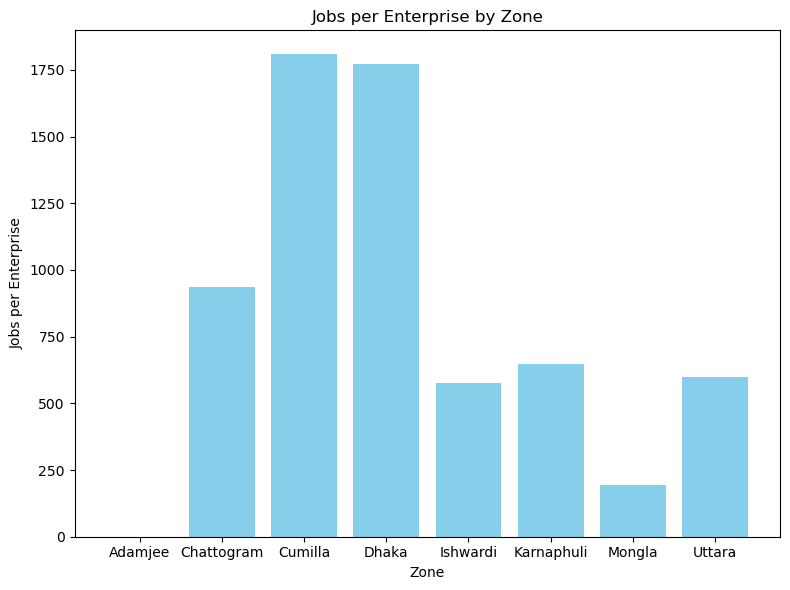

In [15]:
plt.figure(figsize=(8,6))
plt.bar(q3["Zone"], q3["JobsPerEnterprise"], color="skyblue")
plt.title("Jobs per Enterprise by Zone")
plt.ylabel("Jobs per Enterprise")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chart3_jobs_per_enterprise.png")
plt.show()

In [16]:
# Query 4: Export earnings by investing country
q4 = merged_df.groupby("InvestingCountry").agg(
    TotalExport=("ExportEarned", "sum"),
    EnterpriseCount=("NameOfEnterprise", "count")
).reset_index()

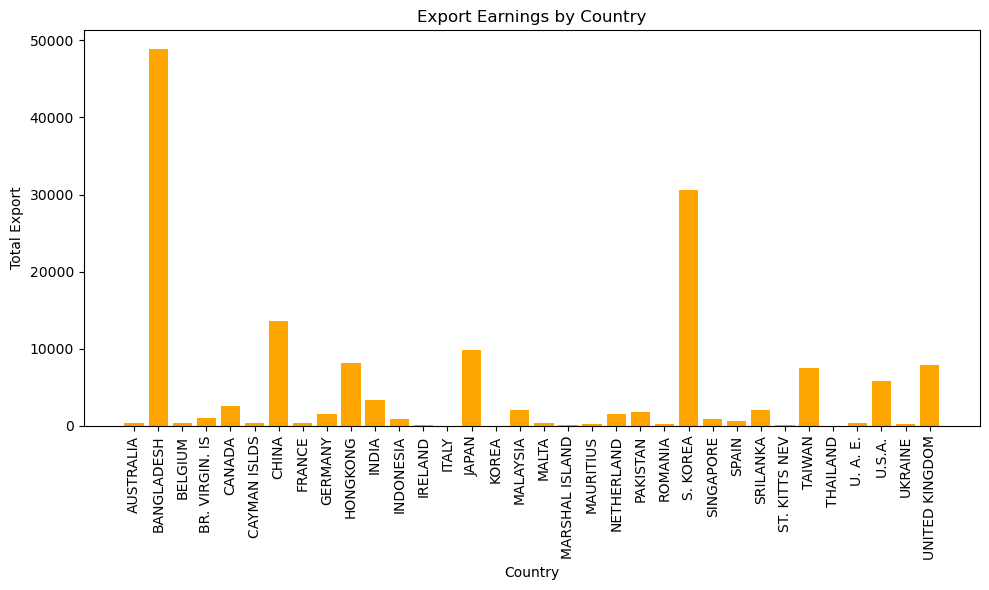

In [39]:
plt.figure(figsize=(10,6))
plt.bar(q4["InvestingCountry"], q4["TotalExport"], color="orange")
plt.title("Export Earnings by Country")
plt.ylabel("Total Export")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("chart4_export_by_country.png")
plt.show()

In [18]:
# Query 5: Investment per enterprise per zone
q5 = merged_df.groupby("Zone").agg(
    InvestmentTotal=("TotalInvestment", "sum"),
    EnterpriseCount=("NameOfEnterprise", "count")
).reset_index()
q5["InvestmentPerEnterprise"] = q5["InvestmentTotal"] / q5["EnterpriseCount"].replace(0,1)

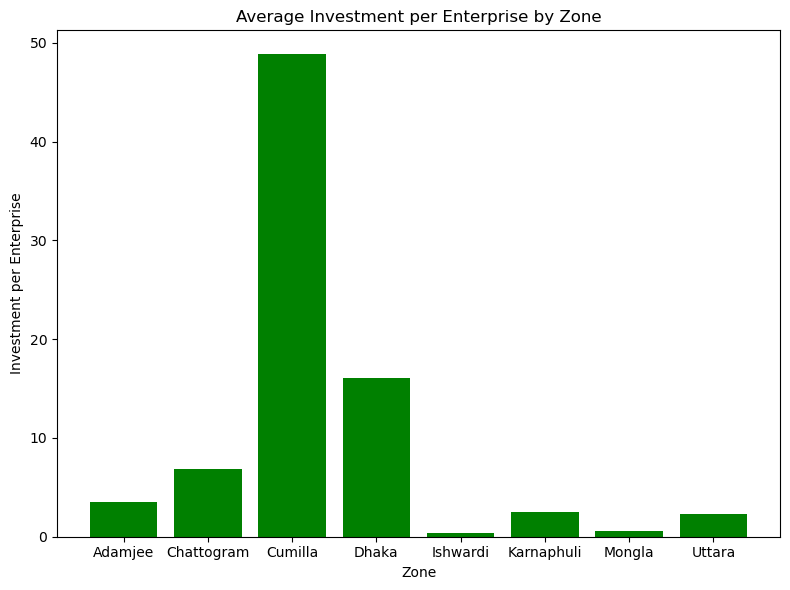

In [19]:
plt.figure(figsize=(8,6))
plt.bar(q5["Zone"], q5["InvestmentPerEnterprise"], color="green")
plt.title("Average Investment per Enterprise by Zone")
plt.ylabel("Investment per Enterprise")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chart5_investment_per_enterprise.png")
plt.show()

In [20]:
# Query 6: Jobs by product category
q6 = merged_df.groupby("Products").agg(
    TotalJobs=("NewJobOpportunity", "sum")
).reset_index()

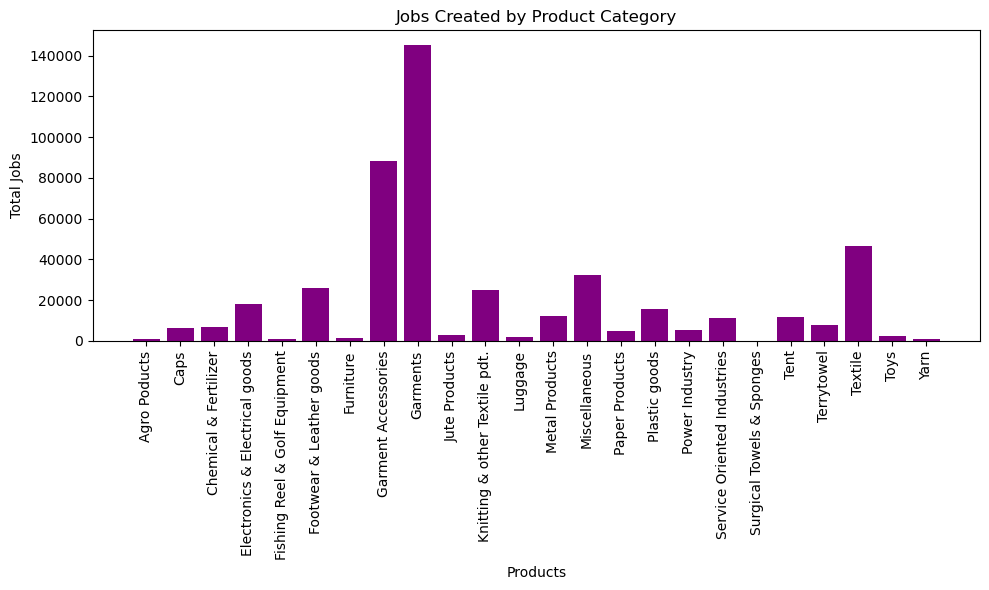

In [38]:
plt.figure(figsize=(10,6))
plt.bar(q6["Products"], q6["TotalJobs"], color="purple")
plt.title("Jobs Created by Product Category")
plt.ylabel("Total Jobs")
plt.xlabel("Products")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("chart6_jobs_by_product.png")
plt.show()

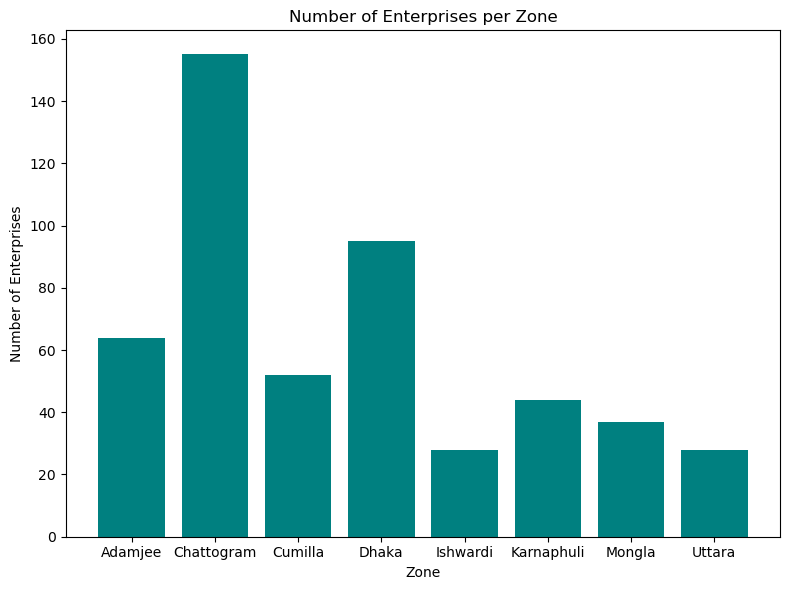

In [25]:
# 7 Number of enterprises per Zone
q7 = data_df.groupby("Zone").agg(EnterpriseCount=("NameOfEnterprise", "count")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(q7["Zone"], q7["EnterpriseCount"], color="teal")
plt.title("Number of Enterprises per Zone")
plt.ylabel("Number of Enterprises")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chartA_enterprises_per_zone.png")
plt.show()

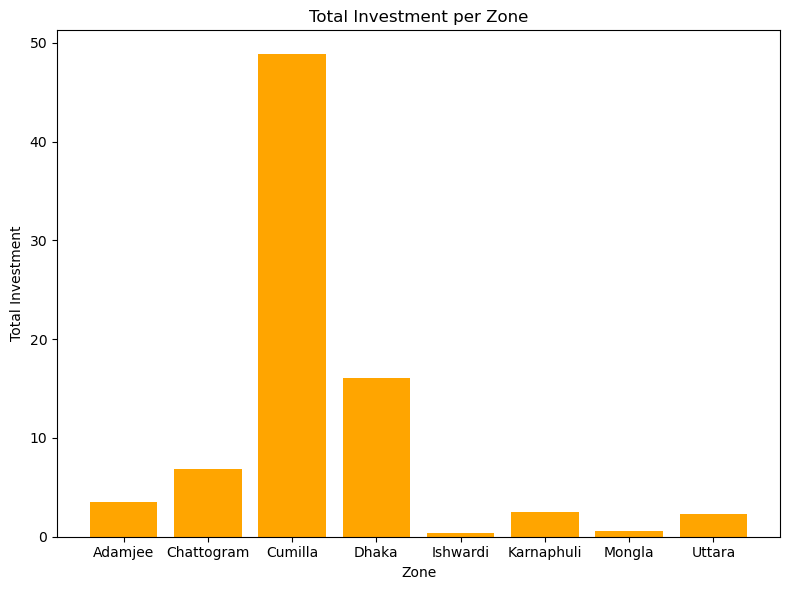

In [26]:
# 8. Total investment per Zone
q8 = zone_df.groupby("Zone").agg(TotalInvestment=("TotalInvestment", "sum")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(q8["Zone"], q8["TotalInvestment"], color="orange")
plt.title("Total Investment per Zone")
plt.ylabel("Total Investment")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chartB_total_investment_per_zone.png")
plt.show()

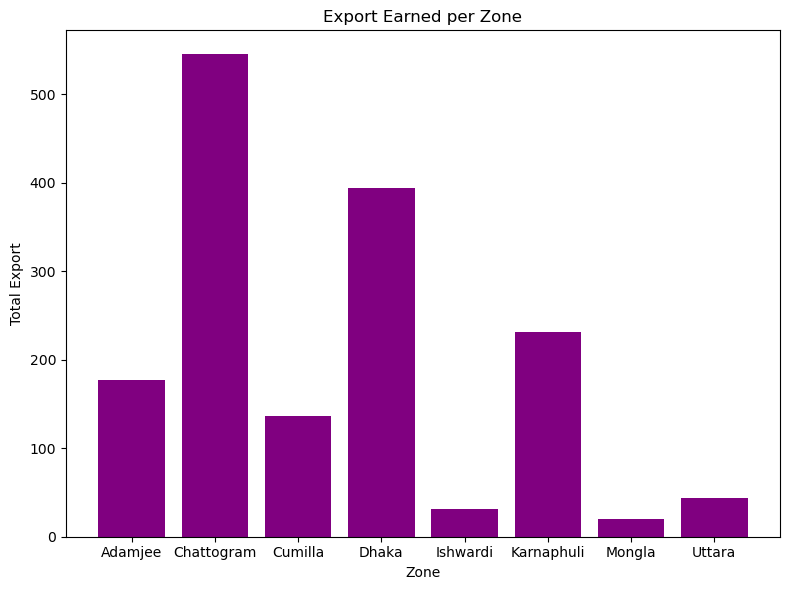

In [27]:
# 9. Export earned per Zone
q9 = zone_df.groupby("Zone").agg(TotalExport=("ExportEarned", "sum")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(q9["Zone"], q9["TotalExport"], color="purple")
plt.title("Export Earned per Zone")
plt.ylabel("Total Export")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chartC_export_per_zone.png")
plt.show()

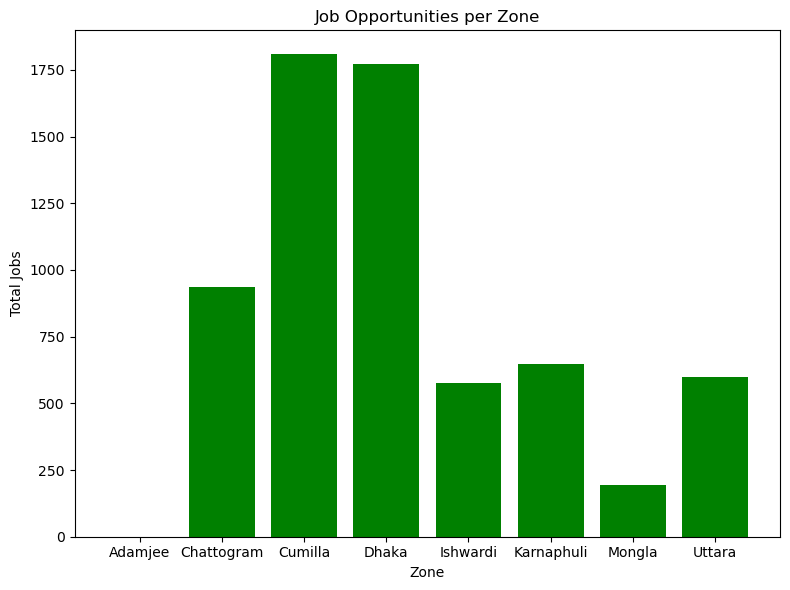

In [29]:
# 10 Job opportunities per Zone
q10 = zone_df.groupby("Zone").agg(TotalJobs=("NewJobOpportunity", "sum")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(q10["Zone"], q10["TotalJobs"], color="green")
plt.title("Job Opportunities per Zone")
plt.ylabel("Total Jobs")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chartD_jobs_per_zone.png")
plt.show()

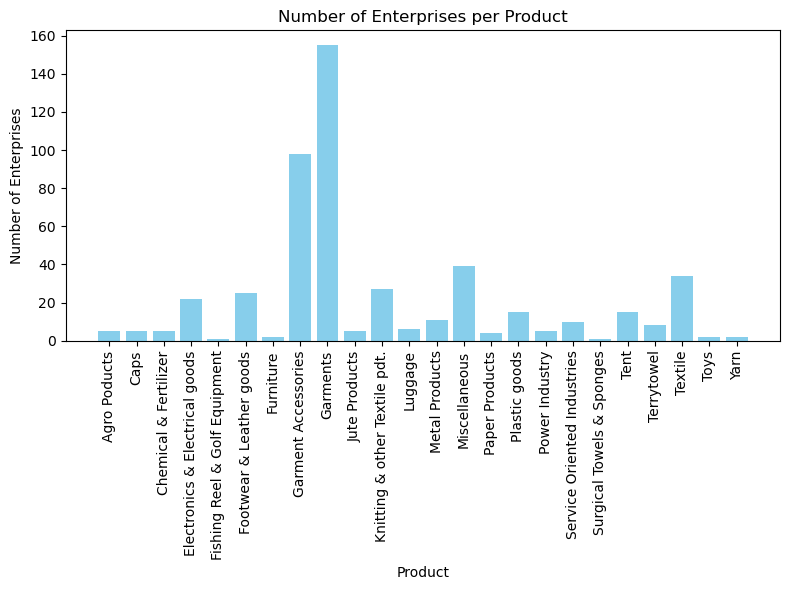

In [37]:
# 11. Number of enterprises per Product
q11 = data_df.groupby("Products").agg(EnterpriseCount=("NameOfEnterprise", "count")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(q11["Products"], q11["EnterpriseCount"], color="skyblue")
plt.title("Number of Enterprises per Product")
plt.ylabel("Number of Enterprises")
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("chartE_enterprises_per_product.png")
plt.show()

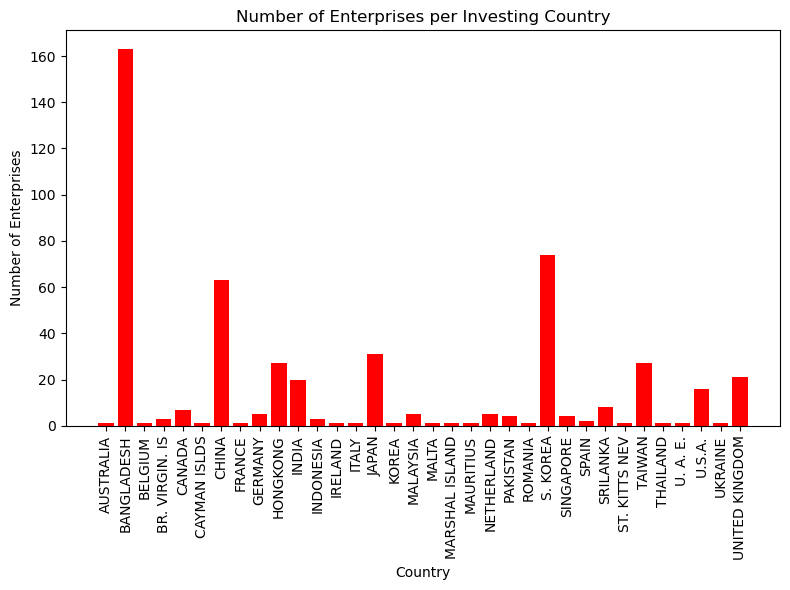

In [36]:
# 12 Number of enterprises per Investing Country
q12 = data_df.groupby("InvestingCountry").agg(EnterpriseCount=("NameOfEnterprise", "count")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(q12["InvestingCountry"], q12["EnterpriseCount"], color="red")
plt.title("Number of Enterprises per Investing Country")
plt.ylabel("Number of Enterprises")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("chartF_enterprises_per_country.png")
plt.show()

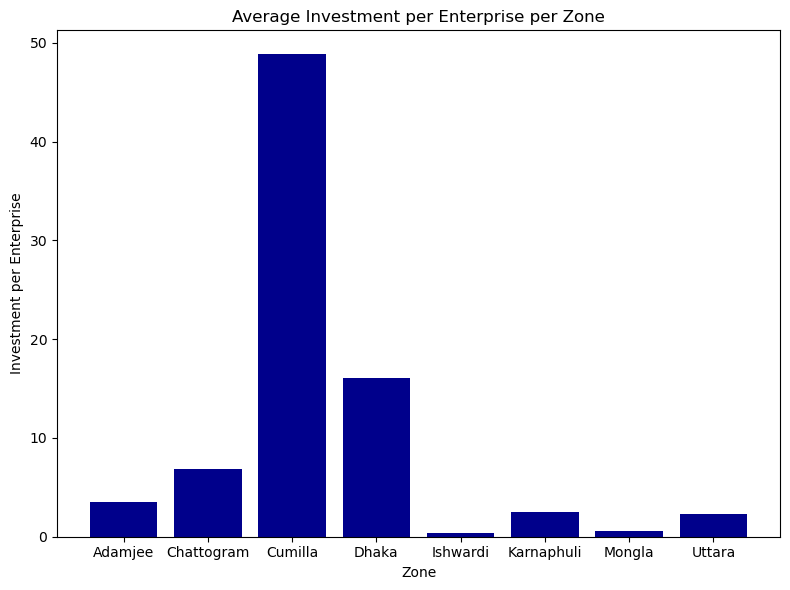

In [33]:
# 13. Average Investment per Enterprise per Zone
merged_group = merged_df.groupby("Zone").agg(
    TotalInvestment=("TotalInvestment", "sum"),
    EnterpriseCount=("NameOfEnterprise", "count")
).reset_index()
merged_group["InvestmentPerEnterprise"] = merged_group["TotalInvestment"] / merged_group["EnterpriseCount"].replace(0,1)

plt.figure(figsize=(8,6))
plt.bar(merged_group["Zone"], merged_group["InvestmentPerEnterprise"], color="darkblue")
plt.title("Average Investment per Enterprise per Zone")
plt.ylabel("Investment per Enterprise")
plt.xlabel("Zone")
plt.tight_layout()
plt.savefig("chartG_investment_per_enterprise.png")
plt.show()

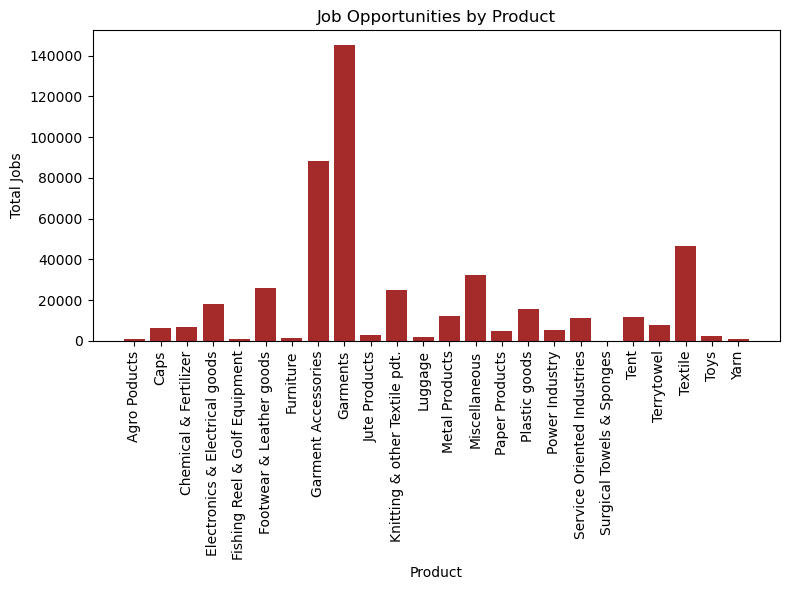

In [35]:
# 14. Job Opportunities by Product
merged_product_jobs = merged_df.groupby("Products").agg(TotalJobs=("NewJobOpportunity", "sum")).reset_index()
plt.figure(figsize=(8,6))
plt.bar(merged_product_jobs["Products"], merged_product_jobs["TotalJobs"], color="brown")
plt.title("Job Opportunities by Product")
plt.ylabel("Total Jobs")
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("chartH_jobs_by_product.png")
plt.show()